# On Decision Trees

Let's do a simple internet image search for decision trees.

What does this have to do with data science?

In [29]:
!conda install python-graphviz -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



-Giving conditions to predict an outcome
-Questions whose answers depend on multiple factors

A decision tree is a machine learning model that works by *partitioning* our sample space in a hierarchical way.

*How* do we partition the space? The key idea is that some attributes provide more *information* than others when trying to make a decision.

## Motivating Example

Suppose a friend said to you: "Hey, you have experience predicting housing prices! I'm hoping you can predict what my house will sell for."

What are the top questions you would ask about your friend's house? Let's make a list:

-where is it
-how big is it
-how many bedrooms
-how old is it
-in what condition is it


Now: *Why* are these questions good questions?

-these answers have a great impact on price.

## A Bit More Detail

Suppose that we work for a retail company and that we're working on a classification model that can predict whether customers will pay their bills or not. In effect what we want to do is to ask questions that will *sort* our customers into two classes: (i) those who pay and (ii) those who don't.

**If I ask enough data-dividing questions, I can produce a partition of my data such that, in each subset, either (i) everyone is a payer or (ii) everyone is a non-payer.**

Each row in my dataframe represents a customer, and I have many predictors (columns) in my dataframe, including:

- salary
- total_bill
- club_member (boolean)
- years_post-sec_ed

Let's look at a simple set of data. **The 'paid' column is our target or dependent variable.**

In [30]:
import pandas as pd
custs = pd.DataFrame([[45000, 1000, True, 2, False], [70000, 100, True, 10, True],
             [30000, 2000, False, 0, False], [90000, 500, True, 2, True],
             [70000, 200, True, 5, False]],
            columns=['salary', 'total_bill', 'club_member', 'years_post-sec_ed',
                    'paid'])
custs

,salary,total_bill,club_member,years_post-sec_ed,paid
0,45000,1000,True,2,False
1,70000,100,True,10,True
2,30000,2000,False,0,False
3,90000,500,True,2,True
4,70000,200,True,5,False


## Partitioning

I partition my data by asking a question about the independent variables. The goal is to ask the right questions in the right order so that the resultant groups are "pure" with respect to the dependent variable. More on this below!

Suppose, for example, that I choose:

### Is the customer a club member?

This would divide my data into two groups:

- Group 1 (club_member = True):

data points: 0, 1, 3, 4

- Group 2 (club_member = False):

data points: 2

#### Key Question: How are the values of the target distributed in this group?
In Group 1, I have, in order: non-payer, payer, payer, non-payer.

In Group 2, I have a single non-payer.

While I've isolated one of the customers who haven't paid in the second group, the first group is an even mix of payers and non-payers. So this split is not particularly good.

Would a different question split our data more effectively? Let's try:

### "Is the customer's salary less than $60k?"

This would divide my data into two groups:

- Group 1 (salary < 60000):

data points: 0, 2

-  Group 2 (salary $\geq$ 60000):

data points: 1, 3, 4

#### Key Question: How are the values of the target distributed in this group?
In Group 1, I have two non-payers.

In Group 2, I have, in order: payer, payer, non-payer.

This does a better job of partitioning my data according to the values of the dependent variable: The first group contains only customers who have not paid their bills, and the second group contains only one customer who has not paid her bill.

So a (very simple!) model that predicts:
(i) that customers who make less than \$60k *won't* pay their bill, and
(ii) that customers who make $60k or more *will* pay their bill

would perform fairly well.

But how would my partition be *best* split? And how do I really know that the second split is better than the first? Can I do better than intuition here?

## Entropy and Information Gain

The goal is to have our ultimate classes be fully "ordered" (for a binary dependent variable, we'd have the 1's in one group and the 0's in the other). So one way to assess the value of a split is to measure how *disordered* our groups are, and there is a notion of *entropy* that measures precisely this.

The entropy of the whole dataset is given by:

$\large E = -\Sigma^n_i p_i\log_2(p_i)$,

where $p_i$ is the probability of belonging to the $i$th group, where $n$ is the number of groups (i.e. target values).

**Entropy will always be between 0 and 1. The closer to 1, the more disordered your group.**

To repeat, in the present case we have only two groups of interest: the payers and the non-payers.

Two out of five are payers and three out of five are non-payers, so **these are the relevant probabilities** for our calculation of entropy.

So our entropy for this toy dataset is:

$-0.4*\log_2(0.4) -0.6*\log_2(0.6)$.

Let's use the ```math``` library to calculate this:

In [31]:
from math import log

# Your code here!

ent_whole = -0.4*log(0.4,2) -0.6*log(0.6,2)

That's pretty disordered!

To calculate the entropy of a *split*, we're going to want to calculate the entropy of each of the groups made by the split, and then calculate a weighted average of those groups' entropies––weighted, that is, by the size of the groups. Let's calculate the entropy of the split produced by our question above about salary:

Group 1:

$E_{g1} = - 1 * \log_2(1) = 0$. This is a pure group! The probability of being a payer in Group 1 is 0 and the probability of being a non-payer in Group 1 is 1.

Group 2:

$E_{g2} = \frac{2}{3} * \log_2\left(\frac{2}{3}\right) - \frac{1}{3} * \log_2\left(\frac{1}{3}\right)$.

Once again, using ```math```:

In [32]:
# Your code here!

ent_grp2 = -(2/3)*log(2/3,2)-(1/3)*log(1/3,2)

To get the whole entropy for this split, we'll do a weighted sum of the two group entropies:

In [33]:
# Your code here!

0.4*0+0.6*ent_grp2

0.5509775004326937

For a given split, the **information gain** is simply the entropy of the parent group less the entropy of the split.

For a given parent, then, we maximize our model's performance by *minimizing* the split's entropy.

What we'd like to do then is:

1. to look at the entropies of all possible splits, and
2. to choose the split with the lowest entropy.

In practice there are far too many splits for it to be practical for a person to calculate all these different entropies ...

... but we can make computers do these calculations for us!

## Gini Impurity

An alternative metric to entropy comes from the work of Corrado Gini. The Gini Impurity is defined as:

$\large G = 1 - \Sigma_i p_i^2$,

where, again, $p_i$ is the probability of belonging to the $i$th group.

**Gini Impurity will always be between 0 and 0.5. The closer to 0.5, the more disordered your group.**

Exercise: Calculate the Gini Impurity for our toy dataset above.

In [34]:
# Your code here!



## Coding Trees in Python

Scikit-learn has a tree module, which houses both a DecisionTreeClassifier and a DecisionTreeRegressor. As is probably clear by now, is that the former is for classification problems (discrete target) and the latter is for regression problems (continuous target). Let's use the classifier.

(Of course, the regressor can't quite work the same way as detailed here! For more details on this, see [here](https://www.saedsayad.com/decision_tree_reg.htm) and [here](https://acadgild.com/blog/using-decision-trees-for-regression-problems).)

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
ct = DecisionTreeClassifier() # Check out all the
                              # hyperparameter options here!

ct.fit(custs.drop('paid', axis=1), custs['paid'])
ct.score(custs.drop('paid', axis=1), custs['paid'])    
#score is measure of accuracy and shows how many points are truly classified

1.0

Let's visualize this!

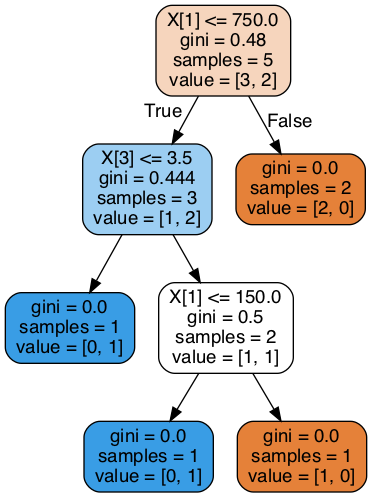

In [37]:
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

dot_file = StringIO()

export_graphviz(ct, out_file=dot_file, filled=True,
               rounded=True)

image=pydotplus.graph_from_dot_data(dot_file.getvalue())
Image(image.create_png())

In [38]:
ct.tree_.node_count

7

In [39]:
import numpy as np

In [40]:
n_nodes = ct.tree_.node_count
children_left = ct.tree_.children_left
children_right = ct.tree_.children_right
feature = ct.tree_.feature
threshold = ct.tree_.threshold

# This code courtesy of sklearn:
# https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature[i],
                 threshold[i],
                 children_right[i],
                 ))
print()

The binary tree structure has 7 nodes and has the following tree structure:
node=0 test node: go to node 1 if X[:, 1] <= 750.0 else to node 6.
	node=1 test node: go to node 2 if X[:, 3] <= 3.5 else to node 3.
		node=2 leaf node.
		node=3 test node: go to node 4 if X[:, 1] <= 150.0 else to node 5.
			node=4 leaf node.
			node=5 leaf node.
	node=6 leaf node.



### Interpretation

Let's unpack this:

The first question ("test") is: "Is Salary $\leq$ 57500?" If so, then stop: All such customers (i.e. customers 0 and 2) are *non-payers*. Notice how 57500 is midway between the salaries of customer 0 (45000, a non-payer) and customers 1 and 4 (70000, payers).

If not: The next test (for those whose salary > 57500) is: "Is Total Bill $\leq$ 150?" If so, then stop: All such customers (i.e. customer 1) are *payers*. Notice how 150 is midway between the total bills of customer 1 (100, a payer) and customer 4 (200, a non-payer).

If not: The next test (for those whose total bill > 150) is: "Is Salary $\leq$ 80000?" If so, then stop: All such customers (i.e. customer 3) are *non-payers*. If not, then stop: All such customers (i.e. customer 4) are *payers*. Notice how 3.5 is midway between the numbers of years of post-sec ed of customer 3 (90000, a payer) and customer 4 (70000, a non-payer).

In [41]:
node_depth

array([0, 1, 2, 2, 3, 3, 1])

In [42]:
ct.tree_.children_left

array([ 1,  2, -1,  4, -1, -1, -1])

In [43]:
ct.tree_.children_right

array([ 6,  3, -1,  5, -1, -1, -1])